# 读取股票数据表和研究报告表，并生成合并表

## 读取研究报告总表 简单处理

In [1]:
import pandas as pd

df1 = pd.read_csv('海康威视_report_total.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
df1.set_index(df1['date'],inplace=True) # (836, 5)
df1.sort_index(inplace=True)  # 排序后生效，改变原数据
df1

,date,content,coarseWords,thinWords,keyWords,affectiveClassification
date,,,,,,
2010-05-11,2010-05-11,投资要点： \r\n 公司是安防视频监控产品供应商。后端产品硬盘录像机（DVR）、...,投资 要点 公司 安防 视频 监控 产品 供应商 后 端 产品 硬盘 录像机 视音频 编解码...,"[('上升', 1), ('上市', 1), ('下降', 1), ('为', 4), ('...","[('09', 0.24497474391188523), ('公司', 0.2297357...",neutral
2010-05-12,2010-05-12,公司是国内最大的视频监控系统和数字硬盘录像机供应商 \r\n 公司在视频监控系统领...,公司 国内 视频 监控 系统 数字 硬盘 录像机 供应商 公司 视频 监控 系统 领域 年 ...,"[('上升', 1), ('上市', 7), ('下跌', 2), ('下降', 2), (...","[('公司', 0.1352691097907336), ('安防', 0.12574697...",neutral
2010-05-14,2010-05-14,询价结论： \r\n 我们预计公司10-12 年每股收益为1.94 元、2.61 ...,询价 结论 预计 公司 年 每股 收益 为元元 元 年 市盈率 倍 之间 建议 一级 市场 ...,"[('下降', 1), ('为', 3), ('保持', 5), ('加剧', 1), ('...","[('安防', 0.5205005924664383), ('监控', 0.25471397...",neutral
2010-05-17,2010-05-17,尽管近期新股上市受二级市场影响而加速破发，但新股发行节奏依然我行我素，5 月 17 日至19...,近期 新股 上市 受 二级 市场 影响 加速 破发 新股 发行 节奏 依然 我行我素 月 日...,"[('上市', 1), ('上网', 1), ('下降', 1), ('中', 1), ('...","[('威视', 0.2931686853572207), ('海康', 0.27617052...",neutral
2010-05-18,2010-05-18,主要产品。公司产品是安防监控产品，主要包括硬盘录像机、视音频编解码卡、视频服务器、监控摄像机...,产品 公司 产品 安防 监控 产品 包括 硬盘 录像机 视音频 编解码 卡 视频 服务器 监...,"[('为', 6), ('代表', 1), ('优惠', 1), ('使', 1), ('促...","[('摄像机', 0.15009810707889762), ('监控', 0.146410...",neutral
...,...,...,...,...,...,...
2023-04-18,2023-04-18,事件：公司发布2022 年年报和2023 年一季报，2022 年全年实现营业收入831.66...,事件 公司 发布 年 年报 年 季报 年 全年 营业 收入 亿元 同比 增长 归母 净利润 ...,"[('上', 1), ('上市', 1), ('上涨', 1), ('下沉', 2), ('...","[('2022', 0.14371851642830602), ('亿元', 0.14094...",neutral
2023-04-19,2023-04-19,事件：公司发布2022 年年度报告和2023 年第一季度报告，2022 年公司实现营收831...,事件 公司 发布 年 年度报告 年 第一季度 报告 年 公司 营收 亿元 同比 归母 净利润...,"[('下滑', 2), ('下降', 3), ('为', 3), ('买', 1), ('产...","[('2022', 0.23872807609477725), ('业务', 0.22804...",neutral
2023-04-21,2023-04-21,事件：4 月14 日，公司发布2022 年年度报告，报告期内公司实现营业总收入831.66 ...,事件 月 日 公司 发布 年 年度报告 报告 期内 公司 营业 总收入 亿元 同比 增长 归...,"[('下降', 4), ('为', 2), ('伴随', 2), ('供', 1), ('保...","[('公司', 0.16941344021179883), ('2023', 0.16186...",neutral


## 读取股票数据表 简单处理

In [2]:
data = pd.read_csv('海康威视_clean_MaxMin.csv')
data.set_index(data['date'],inplace=True)
df2 = data[['close','volume','5日均线','10日均线','涨幅','RSI','MACD','MACD_Signal','MACD_Histogram','mixumum','minumum']]
df2.shape

(3110, 11)

## 两表合并为一张表merged_df，输出所有的列名，并打印空值的比例

一天可能有好几份研究报告，需要将日期相同的研究报告合并到一起（df1表）

In [3]:
merged_df = df2.merge(df1, how='left',left_index=True, right_index=True)
merged_df

,close,volume,5日均线,10日均线,涨幅,RSI,MACD,MACD_Signal,MACD_Histogram,mixumum,minumum,date,content,coarseWords,thinWords,keyWords,affectiveClassification
date,,,,,,,,,,,,,,,,,
2010-05-28,-0.821,340983.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2010-05-28,公司是国内视频监控行业的龙头企业，销售规模连续数年居于国内全行业第一位，专业从事安防视频监控...,公司 国内 视频 监控 行业 龙头企业 销售 规模 连续 数年 居于 国内 全 行业 第一位...,"[('上市', 1), ('个性化', 1), ('为', 6), ('为辅', 1), (...","[('监控', 0.19115450968612152), ('公司', 0.1882705...",neutral
2010-05-31,-0.650,172278.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01,-0.525,109946.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2010-06-01,视频监控行业以 DVR 为核心设备，近年来持续成长，应用范围不断延伸。国内企业抓住了行业从模...,视频 监控 行业 核心 设备 近年来 持续 成长 延伸 国内 企业 抓住 行业 模拟化 存储...,"[('为', 2), ('产业化', 2), ('估值', 3), ('做', 2), ('...","[('监控', 0.2744519629173432), ('视频', 0.23784895...",neutral
2010-06-02,-0.589,94962.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-03,-0.839,75605.22,-0.6848,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,34.860,257120.00,34.8820,35.342,-0.031667,41.617989,-1.021249,-1.175628,0.154379,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-01,35.900,507622.00,35.0720,35.449,0.027182,47.594390,-0.897751,-1.120053,0.222302,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-02,35.910,296013.00,35.1660,35.478,0.013262,47.649882,-0.789964,-1.054035,0.264071,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
merged_df.shape

(3110, 17)

# 打印合并表信息

In [5]:
# 输出所有列名
columns = merged_df.columns
print("列名:")
print(columns)

# 计算每列的空值比例
null_ratios = merged_df.isnull().mean()
print("\n空值比例:")
print(null_ratios)

列名:
Index(['close', 'volume', '5日均线', '10日均线', '涨幅', 'RSI', 'MACD', 'MACD_Signal',
       'MACD_Histogram', 'mixumum', 'minumum', 'date', 'content',
       'coarseWords', 'thinWords', 'keyWords', 'affectiveClassification'],
      dtype='object')

空值比例:
close                      0.000000
volume                     0.000000
5日均线                       0.001286
10日均线                      0.002894
涨幅                         0.001608
RSI                        0.004502
MACD                       0.010611
MACD_Signal                0.010611
MACD_Histogram             0.010611
mixumum                    0.000000
minumum                    0.000000
date                       0.884244
content                    0.884244
coarseWords                0.884244
thinWords                  0.884244
keyWords                   0.884244
affectiveClassification    0.884244
dtype: float64


In [6]:
# # 过滤出存在空值的行
# null_rows = merged_df[merged_df.isnull().any(axis=1)]

# # 设置显示选项为完整显示
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # 打印包含空值的行
# null_rows

# 数据特殊处理

## 将两份研究报告之间的所有 涨幅值 累加，空值以均值填充
对两列进行处理，以content不会空的行切分merged_df，对将所有切分出来的子表各自合并为一行，处理方式'volume'/行数间隔,'涨幅'累加，全部处理完成后，将所有的子表再重新按原来的顺序拼接为一张表

In [7]:
# merged_df[['volume','涨幅']]
import pandas as pd

# 切分子表并处理
result_tables = []
grouped = merged_df.groupby(merged_df['content'].isnull().cumsum())
for _, group in grouped:
    if group['content'].any():
        volume_adjusted = group['volume'] / len(group.index)
        increase_accumulated = group['涨幅'] / len(group.index)
        group_processed = pd.DataFrame({'volume': volume_adjusted, '涨幅': increase_accumulated})
        result_tables.append(group_processed)
        

# 重新按原顺序拼接为一张新的数据表
processed_df = pd.concat(result_tables, keys=range(len(result_tables)), names=['group', None])
processed_df.reset_index(level='group', drop=True, inplace=True)
processed_df1 = processed_df

In [8]:
processed_df1.shape

(596, 2)

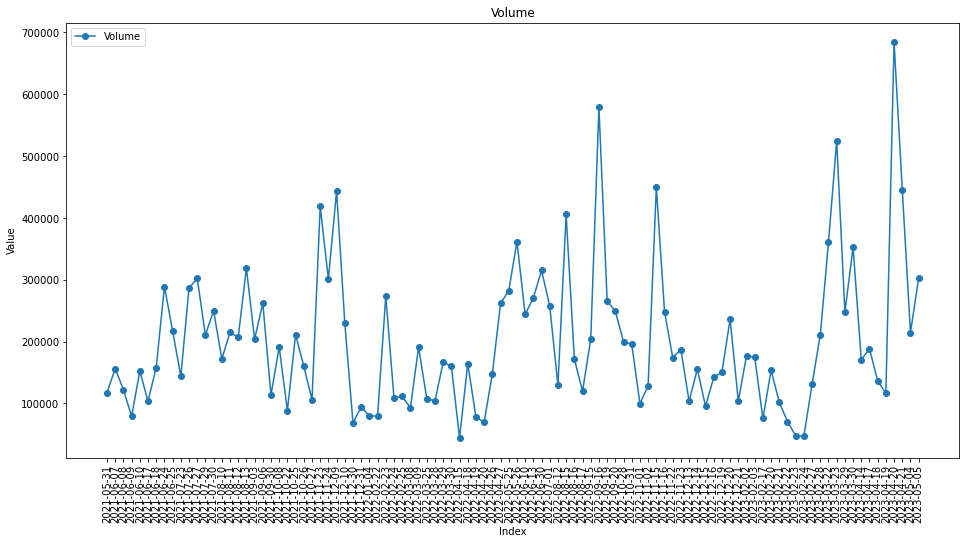

In [9]:
import matplotlib.pyplot as plt
processed_df = processed_df[-100:]
# 绘制折线图
plt.figure(figsize=(16,8))
plt.plot(processed_df.index, processed_df['volume'], marker='o', label='Volume')
plt.xlabel('Index')
# 设置X轴标签垂直显示
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.title('Volume')
plt.legend()
plt.show()

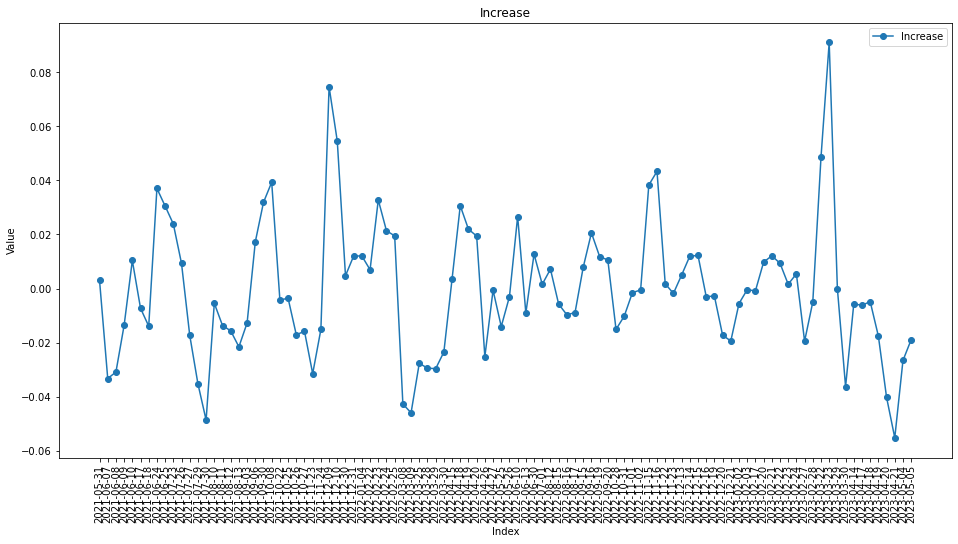

In [10]:
processed_df = processed_df[-100:]
# 绘制折线图
plt.figure(figsize=(16,8))
plt.plot(processed_df.index, processed_df['涨幅'], marker='o', label='Increase')
plt.xlabel('Index')
# 设置X轴标签垂直显示
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.title('Increase')
plt.legend()
plt.show()

## 根据词频生成特征向量

In [11]:
merged_df[['thinWords','keyWords']]

,thinWords,keyWords
date,,
2010-05-28,"[('上市', 1), ('个性化', 1), ('为', 6), ('为辅', 1), (...","[('监控', 0.19115450968612152), ('公司', 0.1882705..."
2010-05-31,NaN,NaN
2010-06-01,"[('为', 2), ('产业化', 2), ('估值', 3), ('做', 2), ('...","[('监控', 0.2744519629173432), ('视频', 0.23784895..."
2010-06-02,NaN,NaN
2010-06-03,NaN,NaN
...,...,...
2023-05-31,NaN,NaN
2023-06-01,NaN,NaN
2023-06-02,NaN,NaN


In [12]:
import ast
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert string representation of tuples to actual tuples
merged_df['thinWords'] = merged_df['thinWords'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
merged_df['keyWords'] = merged_df['keyWords'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Extract text content from thinWords and keyWords
thinWords_texts = merged_df['thinWords'].apply(lambda x: ' '.join([word for word, count in x]))
keyWords_texts = merged_df['keyWords'].apply(lambda x: ' '.join([word for word, weight in x]))

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Vectorize thinWords
thinWords_vectors = vectorizer.fit_transform(thinWords_texts).toarray()
thinWords_feature_names = vectorizer.get_feature_names()

# Vectorize keyWords
keyWords_vectors = vectorizer.fit_transform(keyWords_texts).toarray()
keyWords_feature_names = vectorizer.get_feature_names()

# Create new columns in the DataFrame with the vectorized results
merged_df['thinWords_vectors'] = thinWords_vectors.tolist()
merged_df['keyWords_vectors'] = keyWords_vectors.tolist()

# Print the DataFrame with the new columns
merged_df


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,close,volume,5日均线,10日均线,涨幅,RSI,MACD,MACD_Signal,MACD_Histogram,mixumum,minumum,date,content,coarseWords,thinWords,keyWords,affectiveClassification,thinWords_vectors,keyWords_vectors
date,,,,,,,,,,,,,,,,,,,
2010-05-28,-0.821,340983.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2010-05-28,公司是国内视频监控行业的龙头企业，销售规模连续数年居于国内全行业第一位，专业从事安防视频监控...,公司 国内 视频 监控 行业 龙头企业 销售 规模 连续 数年 居于 国内 全 行业 第一位...,"[(上市, 1), (个性化, 1), (为, 6), (为辅, 1), (会, 1), (...","[(监控, 0.19115450968612152), (公司, 0.18827058108...",neutral,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2010-05-31,-0.650,172278.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,[],[],NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2010-06-01,-0.525,109946.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2010-06-01,视频监控行业以 DVR 为核心设备，近年来持续成长，应用范围不断延伸。国内企业抓住了行业从模...,视频 监控 行业 核心 设备 近年来 持续 成长 延伸 国内 企业 抓住 行业 模拟化 存储...,"[(为, 2), (产业化, 2), (估值, 3), (做, 2), (具备, 2), (...","[(监控, 0.2744519629173432), (视频, 0.237848951584...",neutral,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2010-06-02,-0.589,94962.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,[],[],NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2010-06-03,-0.839,75605.22,-0.6848,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,[],[],NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,34.860,257120.00,34.8820,35.342,-0.031667,41.617989,-1.021249,-1.175628,0.154379,False,False,NaN,NaN,NaN,[],[],NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2023-06-01,35.900,507622.00,35.0720,35.449,0.027182,47.594390,-0.897751,-1.120053,0.222302,False,False,NaN,NaN,NaN,[],[],NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2023-06-02,35.910,296013.00,35.1660,35.478,0.013262,47.649882,-0.789964,-1.054035,0.264071,False,False,NaN,NaN,NaN,[],[],NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [29]:
# 使用左连接将两个表合并
thinWords_vectors_merged_table = pd.merge(processed_df1, merged_df[['thinWords_vectors','RSI','MACD_Histogram','affectiveClassification']], how='left', left_index=True, right_on='date')
thinWords_vectors_merged_table['MACD_Histogram'] = thinWords_vectors_merged_table['MACD_Histogram'].fillna(thinWords_vectors_merged_table['MACD_Histogram'].mean())
thinWords_vectors_merged_table['涨幅'] = thinWords_vectors_merged_table['涨幅'].fillna(thinWords_vectors_merged_table['涨幅'].mean())
thinWords_vectors_merged_table['RSI'] = thinWords_vectors_merged_table['RSI'].fillna(thinWords_vectors_merged_table['RSI'].mean())
# 使用特定值填充
thinWords_vectors_merged_table['affectiveClassification'] = thinWords_vectors_merged_table['affectiveClassification'].fillna('neutral')
thinWords_vectors_merged_table

,volume,涨幅,thinWords_vectors,RSI,MACD_Histogram,affectiveClassification
date,,,,,,
2010-05-28,340983.540000,0.004965,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",55.673678,0.029387,neutral
2010-05-31,86139.365000,0.004965,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",55.673678,0.029387,neutral
2010-06-01,54973.400000,0.004965,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",55.673678,0.029387,neutral
2010-08-12,2037.926667,0.014774,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",54.078446,0.048471,neutral
2010-08-13,2153.463333,0.041667,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",57.593257,0.040056,neutral
...,...,...,...,...,...,...
2023-04-19,116673.750000,-0.017572,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",51.478429,-0.300902,neutral
2023-04-20,683893.500000,-0.040225,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",45.483053,-0.453237,neutral
2023-04-21,445881.000000,-0.055176,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",39.388060,-0.657617,neutral


In [30]:
# 输出所有列名
columns = thinWords_vectors_merged_table.columns
print("列名:")
print(columns)

# 计算每列的空值比例
null_ratios = thinWords_vectors_merged_table.isnull().mean()
print("\n空值比例:")
print(null_ratios)

列名:
Index(['volume', '涨幅', 'thinWords_vectors', 'RSI', 'MACD_Histogram',
       'affectiveClassification'],
      dtype='object')

空值比例:
volume                     0.0
涨幅                         0.0
thinWords_vectors          0.0
RSI                        0.0
MACD_Histogram             0.0
affectiveClassification    0.0
dtype: float64


# 特征向量预测

## thinWords特征向量预测涨幅

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# 准备数据
X = thinWords_vectors_merged_table['thinWords_vectors']
y = thinWords_vectors_merged_table['涨幅']

# 重塑X为二维数组
X = np.vstack(X.values)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建岭回归模型并训练
model = Ridge(alpha=0.5)  # alpha是正则化强度参数
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 打印预测结果
print(y_pred)
y_test.values


[ 0.0094858   0.00659171 -0.06095788  0.00659171 -0.01064146  0.05702275
  0.00659171  0.01966459  0.00659171 -0.02044027  0.09121368 -0.01366191
 -0.05601083 -0.05550935  0.14497034  0.0457553  -0.01296141  0.04181482
 -0.05942197  0.00659171  0.00659171  0.00659171 -0.17023274  0.07520974
  0.06122545  0.05154334 -0.02770622  0.00659171  0.15829993 -0.05317604
 -0.10905999  0.00659171  0.0588813   0.00659171  0.00659171  0.00659171
  0.03527402 -0.03666501  0.00659171 -0.09918167  0.00659171  0.00659171
 -0.11139337  0.00659171  0.14390478 -0.05213011 -0.02898448  0.03630399
  0.00659171 -0.0598587   0.05062026 -0.12729186  0.00659171  0.00659171
 -0.03855609  0.16101754  0.00659171  0.00659171 -0.04602997 -0.04657166
  0.00659171  0.00659171  0.00659171 -0.00225008  0.00659171  0.01878034
 -0.02715681  0.02947087  0.00659171  0.00659171  0.00659171  0.00659171
  0.00659171  0.1121568   0.00659171  0.02198033  0.05337502 -0.01934658
  0.03332929 -0.03779432  0.0136068   0.00659171  0

array([ 0.01329345, -0.00326087,  0.01106771, -0.01131153, -0.00970838,
       -0.00250731,  0.06504065,  0.01970212,  0.02079723, -0.00179036,
        0.00947802, -0.00275093,  0.00496548, -0.00161725, -0.00573358,
       -0.17061611,  0.00529194,  0.00038226,  0.02282137,  0.01602136,
        0.05577736, -0.00571652, -0.0037594 ,  0.09920058,  0.00313972,
       -0.00281983,  0.01252019,  0.02372362, -0.00321718,  0.02454806,
        0.01942271,  0.03492239,  0.01550478,  0.01219512,  0.07462361,
       -0.00727864,  0.04713151, -0.01757171, -0.04022472,  0.02057245,
       -0.02235294,  0.02583227,  0.04670006,  0.03458023, -0.02941176,
        0.01908284, -0.04594298,  0.01865782,  0.00789946,  0.00166032,
        0.00598291, -0.0700144 , -0.01038128,  0.01184583,  0.01130988,
        0.01956254,  0.00205761,  0.05521472, -0.01648352, -0.05146822,
       -0.00282841,  0.02869   ,  0.03745984,  0.01769579,  0.01417738,
        0.03151568, -0.00178502, -0.02455382,  0.04846274, -0.00

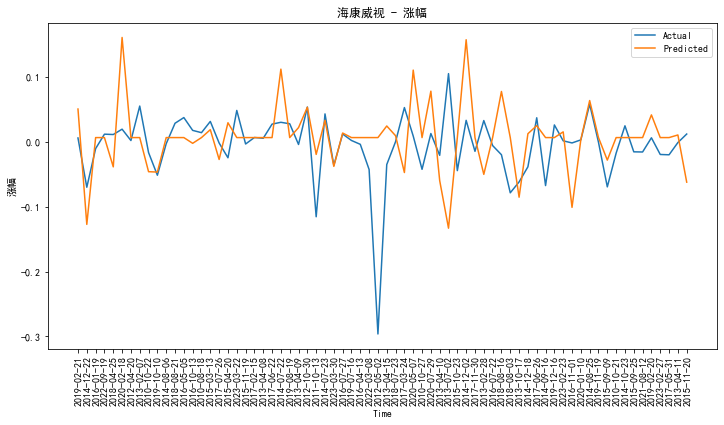

In [32]:
plt.rcParams['font.sans-serif'] = 'SimHei'
# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(y_test[-70:], label='Actual')
plt.plot(y_pred[-70:], label='Predicted')
plt.title('海康威视 - 涨幅')
plt.xlabel('Time')
# 设置X轴标签垂直显示
plt.xticks(rotation='vertical')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('涨幅')
plt.legend()
plt.show()

## thinWords特征向量预测交易量

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# 准备数据
X = thinWords_vectors_merged_table['thinWords_vectors']
y = thinWords_vectors_merged_table['volume']

# 重塑X为二维数组
X = np.vstack(X.values)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 打印预测结果
print(y_pred)
y_test.values

[ 143156.40912685  139228.85345959  239317.24211886  139228.85345959
   70647.35388981  148602.71287755  139228.85345959  149582.92430038
  139228.85345959  171275.91177188  170239.04899138  -39106.775915
   64433.10330786  147580.63577482  274405.67174544   32860.49352354
  117804.01312419  241861.40658738  149361.04644854  139228.85345959
  139228.85345959  139228.85345959  -37815.78813607   15435.16084708
  119715.27887001  187075.69744969   11091.5707914   139228.85345959
  101466.65372297  -71626.68064399  222202.79869546  139228.85345959
  138749.31156604  139228.85345959  139228.85345959  139228.85345959
   43513.64202489  206719.13525173  139228.85345959  119669.8445722
  139228.85345959  139228.85345959  157538.00451513  139228.85345959
  235901.71561469  145263.69039115   27541.18744365  100044.19932158
  139228.85345959   87165.49025056  180220.59121986  102584.00174501
  139228.85345959  139228.85345959   88031.08419365  210400.3496629
  139228.85345959  139228.85345959  -5

array([222083.        ,  38253.        ,  67490.5       , 197390.        ,
       134076.66666667, 279325.        ,  78633.        ,  43769.5       ,
        94347.5       , 187152.        , 180981.        , 162147.66666667,
        54973.4       ,   4879.6       , 405812.        ,   9167.        ,
        45608.        , 143560.66666667,  72012.5       ,  92190.66666667,
       115158.5       , 113982.5       ,   8841.5       ,  36886.5       ,
        38488.5       , 150828.5       ,  46339.85714286, 141601.5       ,
        38309.        , 114460.33333333,  69687.        ,  13116.66666667,
        58694.5       ,   8804.5       , 443672.        , 103877.        ,
         4703.        , 116673.75      , 683893.5       , 578825.5       ,
       101422.5       ,  59202.        , 171745.5       , 200838.5       ,
       103941.        , 121850.        , 190941.5       ,  69207.5       ,
       204110.        ,  85015.        ,  65778.33333333,  95928.        ,
       255352.5       , 2

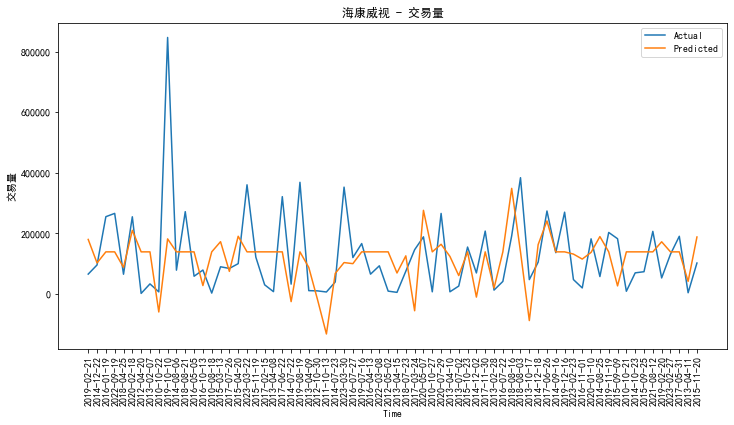

In [34]:
# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(y_test[-70:], label='Actual')
plt.plot(y_pred[-70:], label='Predicted')
plt.title('海康威视 - 交易量')
plt.xlabel('Time')
# 设置X轴标签垂直显示
plt.xticks(rotation='vertical')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('交易量')
plt.legend()
plt.show()

## 'mixumum','minumum'  thinWords特征向量

## RSI thinWords特征向量

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# 准备数据
X = thinWords_vectors_merged_table['thinWords_vectors']
y = thinWords_vectors_merged_table['RSI']

# 重塑X为二维数组
X = np.vstack(X.values)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 打印预测结果
print(y_pred)
y_test.values

[55.00719138 54.49375395 49.33590639 54.49375395 55.87564258 61.50364283
 54.49375395 67.86698278 54.49375395 39.03909609 61.89976825 50.95478895
 47.68074892 55.75226262 63.05539913 54.78650853 55.97858981 54.97305246
 69.35118362 54.49375395 54.49375395 54.49375395 52.63665868 51.09191061
 54.55132643 58.51160047 51.89118307 54.49375395 56.63092002 65.01828981
 67.02176236 54.49375395 65.36542217 54.49375395 54.49375395 54.49375395
 72.69188462 57.99397717 54.49375395 32.64598445 54.49375395 54.49375395
 66.15158797 54.49375395 58.97946584 64.79305213 59.91028234 76.8489378
 54.49375395 56.71866569 56.92449728 62.87656161 54.49375395 54.49375395
 55.8618664  44.83308212 54.49375395 54.49375395 58.46888138 42.67588123
 54.49375395 54.49375395 54.49375395 74.31009085 54.49375395 68.58863532
 60.89624807 87.11896589 54.49375395 54.49375395 54.49375395 54.49375395
 54.49375395 60.50576161 54.49375395 58.36086644 60.64082389 53.19374589
 61.38706536 66.96796872 60.59355594 54.49375395 54.

array([56.07606943, 52.28986146, 54.86659775, 49.31768409, 59.00445316,
       66.30013537, 62.69666185, 83.36436047, 52.68413203, 55.77174011,
       53.88764833, 64.22892581, 55.67367807, 52.17851733, 43.43179159,
       71.51234467, 74.2052005 , 44.4415986 , 86.60238875, 67.25132445,
       53.26809452, 72.31392604, 60.09083917, 53.18803176, 61.20735438,
       62.14371779, 61.73233453, 70.53610573, 63.13026347, 65.3820578 ,
       50.33207563, 60.29968226, 50.88493252, 68.56093847, 64.80572424,
       42.84648791, 62.50554344, 51.47842857, 45.48305323, 47.16216639,
       40.23435978, 81.68987841, 56.28066701, 59.06464329, 32.92382935,
       45.48287289, 29.08976431, 80.2627555 , 38.61501573, 40.96444648,
       72.47477485, 55.10538728, 33.21273505, 45.887934  , 44.33724072,
       59.56175005, 53.43059724, 52.66095846, 47.30704737, 37.36253165,
       64.03992609, 50.46607024, 61.74906208, 55.80324411, 55.18737107,
       52.6638592 , 48.11187135, 48.20824214, 68.87368978, 54.77

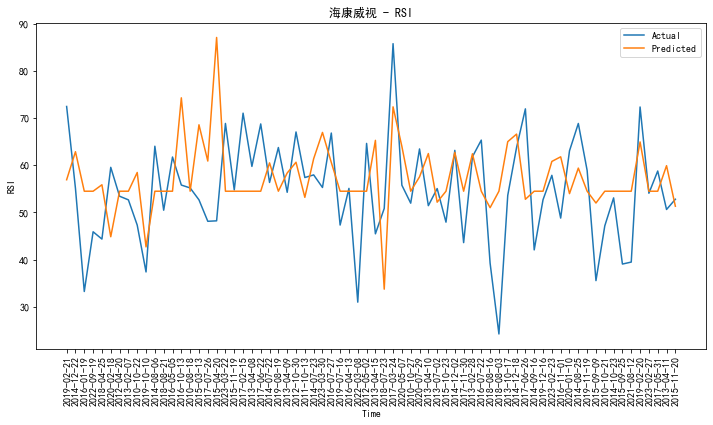

In [36]:
# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(y_test[-70:], label='Actual')
plt.plot(y_pred[-70:], label='Predicted')
plt.title('海康威视 - RSI')
plt.xlabel('Time')
# 设置X轴标签垂直显示
plt.xticks(rotation='vertical')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('RSI')
plt.legend()
plt.show()

## MACD_Histogram thinWords特征向量

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# 准备数据
X = thinWords_vectors_merged_table['thinWords_vectors']
y = thinWords_vectors_merged_table['MACD_Histogram']

# 重塑X为二维数组
X = np.vstack(X.values)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 打印预测结果
print(y_pred)
y_test.values

[ 0.01186765  0.02210397 -0.01957556  0.02210397 -0.23885517  0.04372292
  0.02210397  0.10762877  0.02210397 -0.35999303  0.01438153  0.04643912
 -0.04488229 -0.01420944  0.13624462  0.19802534 -0.29737645  0.33547684
  0.14578226  0.02210397  0.02210397  0.02210397 -0.29755209 -0.00325244
 -0.04969034  0.00396541  0.11339702  0.02210397  0.43050517  0.26831927
  0.21587819  0.02210397  0.21506721  0.02210397  0.02210397  0.02210397
  0.13327891 -0.24246906  0.02210397 -0.11853321  0.02210397  0.02210397
  0.11003696  0.02210397  0.24263807  0.12605535  0.14747699  0.24547072
  0.02210397  0.16007881  0.17257413 -0.09003502  0.02210397  0.02210397
  0.24820796  0.02726654  0.02210397  0.02210397  0.19695722 -0.16128043
  0.02210397  0.02210397  0.02210397  0.2561528   0.02210397 -0.02294454
  0.08466106  0.1168158   0.02210397  0.02210397  0.02210397  0.02210397
  0.02210397  0.09713119  0.02210397 -0.13189184  0.02668461  0.06038633
  0.21967082  0.19757373  0.10571869  0.02210397  0

array([ 2.65013044e-02,  6.79272800e-03,  2.69530141e-01, -3.35784782e-01,
        3.60842415e-02, -4.72849266e-02,  1.05239942e-01,  1.90042848e-01,
        1.72491572e-02,  2.27405588e-01, -8.75834069e-02,  6.64364602e-02,
        2.93871355e-02, -3.56957790e-02,  2.01297361e-01,  7.40702168e-03,
       -5.48050459e-02, -9.74404145e-02,  1.28033936e-01,  2.10625128e-01,
        7.51080173e-02,  1.42339256e-02, -1.85945843e-02, -2.37204099e-02,
        5.84096509e-02,  5.89202402e-02,  8.97501493e-02,  2.06711857e-02,
        7.87740014e-03,  6.07818471e-01,  4.29889345e-01,  4.12664473e-02,
        1.01630208e-02,  1.73999875e-03,  6.32269521e-01, -4.72679297e-01,
        3.61573836e-02, -3.00901519e-01, -4.53237192e-01,  1.24128477e-01,
       -1.97909664e-01,  6.85171643e-02,  1.35134550e-01,  1.39509935e-01,
       -1.77309697e-01,  5.37871197e-02, -3.67506532e-01,  1.40377258e-01,
        6.22310592e-02, -1.66914491e-01,  2.61315379e-01, -1.28089940e-02,
       -1.61861580e-01,  

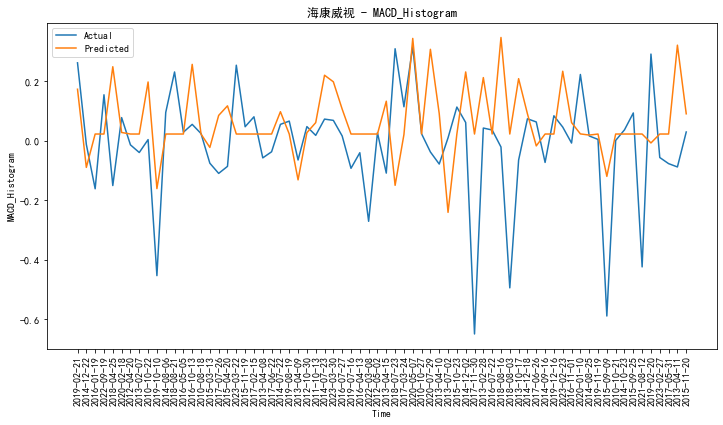

In [27]:
# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(y_test[-70:], label='Actual')
plt.plot(y_pred[-70:], label='Predicted')
plt.title('海康威视 - MACD_Histogram')
plt.xlabel('Time')
# 设置X轴标签垂直显示
plt.xticks(rotation='vertical')
plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('MACD_Histogram')
plt.legend()
plt.show()